# **USING WEIGHT INITIALIZATION TECHNIQUES**

In [2]:
import os

os.chdir("/content/drive/MyDrive/Deep_Learning/vanishing_gradient_problem")
os.getcwd()

'/content/drive/MyDrive/Deep_Learning/vanishing_gradient_problem'

In [3]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)
X.shape

(250, 2)

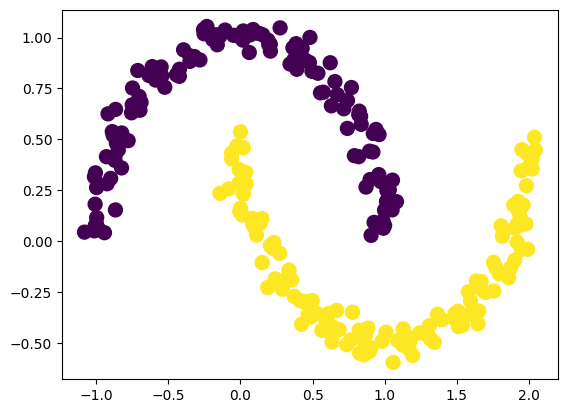

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [8]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim = 2, kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))


Here we have reduced the model's complexity by removing extra hidden layers

In [9]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [10]:
old_weights = model.get_weights()[0]
old_weights

array([[ 1.2263299 , -0.17858987,  0.05828898, -1.035538  ,  0.0811804 ,
         0.14653535, -0.497423  , -0.6318494 ,  0.6329585 ,  0.57767093],
       [-0.36513063, -1.3871542 ,  0.79472935,  1.2386768 ,  0.5448535 ,
        -1.044572  , -0.61205435,  0.6027965 ,  0.2832996 ,  0.1437505 ]],
      dtype=float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
history = model.fit(x=X_train, y=y_train, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 11ms/step - loss: 0.7095 - accuracy: 0.3100
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5250
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.6800
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.7300
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.7550
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.7650
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.7650
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.7700
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6304 - accuracy: 0.7750
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.7800
Epoch 11/100
7/7 [==========

We have trained a better model

In [13]:
new_weights = model.get_weights()[0]

percentage_change_in_weight = abs(100*(new_weights - old_weights)/old_weights)
percentage_change_in_weight

array([[  5.927395 ,   3.6000028, 249.29312  ,  43.903797 ,  43.41455  ,
        112.07513  ,  26.964426 ,   2.2451403,  58.593636 ,   9.672225 ],
       [106.85281  ,  24.433453 ,  22.32876  ,   3.0675962,   8.181487 ,
         13.443497 ,  15.884902 ,  13.206688 , 100.3935   ,  15.371912 ]],
      dtype=float32)

See significant changes are done in the weights

9600/9600 [==============================] - 19s 2ms/step


<Axes: >

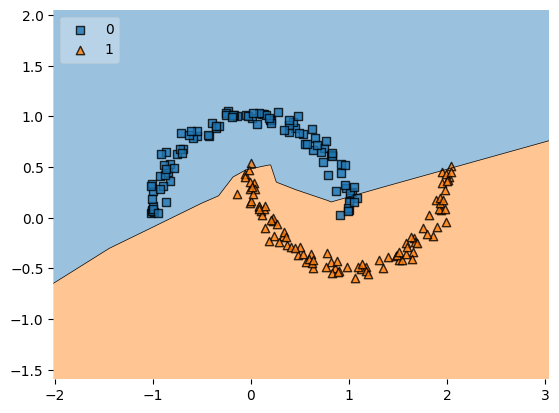

In [14]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.astype('int'), clf = model, legend = 2)

Our model has performed better, but still has some errors